<a href="https://colab.research.google.com/github/vovparya/Urban_University/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B5%D0%BC%D0%B5_%22%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%B8_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%22_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используем уже известный нам набор данных "International Airline Passengers" (количество международных авиапассажиров за месяц). Этот датасет доступен в интернете и часто используется для демонстрации методов анализа временных рядов.
В этом задании мы создадим модель LSTM для предсказания количества пассажиров на основе предыдущих данных.

### Задание: Прогнозирование временного ряда с использованием LSTM

#### Цель
Создать и обучить модель LSTM для предсказания количества международных авиапассажиров на основе временного ряда.

#### Теория

- **Модель LSTM** может использоваться для предсказания последовательности значений на основе предыдущих наблюдений. Она хорошо справляется с задачами, где важно учитывать зависимость данных во времени.

#### Описание кода

1. **Выбор и загрузка набора данных:**  
   Мы используем набор данных "International Airline Passengers", который можно загрузить с помощью URL.

2. **Предобработка данных:**  
   - Нормализация данных.
   - Создание обучающих и тестовых выборок.
   - Формирование временных окон для данных.

3. **Создание и обучение модели:**  
   - Построение модели LSTM для предсказания временного ряда.
   - Обучиние модели на тренировочных данных.

4. **Оценка модели и визуализация результатов:**  
   - Оценим модель на тестовых данных.
   - Визуализируем реальные и предсказанные значения.


### Домашнее задание

1. **Улучшение модели:**  
   - Измените архитектуру модели, добавив больше слоев или изменив количество нейронов.
   - Попробуйте различные гиперпараметры, такие как количество эпох, размер батча и функции активации.

2. **Анализ результатов:**  
   - Оцените модель с использованием метрик, таких как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE).
   - Исследуйте влияние различных временных окон на качество прогноза.
   
3. **Отправьте ссылку на ваш блокнот в Colab преподавателю.**

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0202
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0111
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0049
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

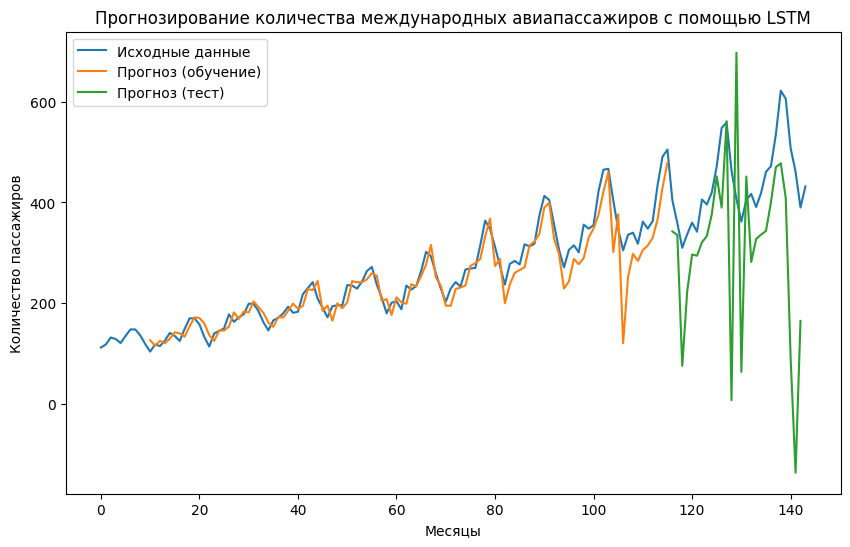

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
import requests
import io

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Просмотр первых строк данных
print(data.head())

# Преобразование данных
data = data['Passengers'].values.astype(float)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Создание обучающих и тестовых выборок
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Разделение на обучающие и тестовые данные
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Изменение формы данных для LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Построение модели LSTM
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Предсказание и оценка модели
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Обратное преобразование предсказанных значений к исходной шкале
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')

# Построение прогноза для обучающей выборки
plt.plot(np.arange(time_step, train_size + time_step), train_predict, label='Прогноз (обучение)')

# Построение прогноза для тестовой выборки
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(test_predict)), test_predict, label='Прогноз (тест)')

plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Количество пассажиров')
plt.title('Прогнозирование количества международных авиапассажиров с помощью LSTM')
plt.show()


# **Домашнее задание.**


**Пояснения к измененному и дополненному коду, ниже.**

*Изменение архитектуры:*

1.Добавлены дополнительные слои LSTM.

2.Увеличено количество нейронов в слоях LSTM (100).

3.Добавлен слой Dropout после каждого слоя LSTM для предотвращения переобучения.

4.Добавлен полностью связанный (Dense) слой с 25 нейронами и функцией активации 'relu'.
Подробнее..:
* ReLU (Rectified Linear Unit) — это функция активации, определяемая как:
[ f(x) = \max(0, x) ]
, она заменяет все отрицательные значения входа на ноль и оставляет положительные значения без изменений.
*   обогащения модели (увеличение количества параметров, глубокая обработка признаков)
*   компромисс между сложностью и производительностью
*   Почему ReLU в Dense слое?
Добавляет нелинейность в модель, позволяя ей обучать сложные зависимости.
И совместимость с регрессионными задачами, при прогнозировании непрерывных значений (как в нашем случае) ReLU хорошо подходит для скрытых слоев, оставляя выходной слой линейным.

*Изменение гиперпараметров:*

Количество эпох (epochs) увеличено до 100 для лучшего обучения модели.

Размер батча (batch_size) установлен на 16.

Функция активации в последнем скрытом слое установлена на 'relu'.



---


Добавление полностью связанного (Dense) слоя с 25 (экспериментальный выбор) нейронами и функцией активации 'relu' служит для укрепления модели, улучшения ее способности обучать сложные нелинейные зависимости и повышения качества предсказаний. Это стратегическое изменение в архитектуре модели позволяет эффективно комбинировать признаки, извлеченные LSTM слоями, и преобразовать их в точные прогнозы.

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

Обучение модели с time_step = 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Метрики для time_step = 5:
Train MSE: 981.5972, Train MAE: 24.1858
Test MSE: 5442.8675, Test MAE: 61.8052

Обучение модели с time_step = 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Метрики для time_step = 10:
Train MSE: 923.6576, Train MAE: 23.7495
Test MSE: 3698.9049, Test MAE: 47.0629

Обучение модели с time_step = 15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Метрики для time_step = 15:
Train MSE: 558.9003, Train MAE: 18.4280
Test MSE: 12431.5905, Test MAE: 96.2462

Обучение модели с time_step = 20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Метрики для time_step = 20:
Train MSE: 416.5046, Train MAE: 16.3527
Test MSE: 8862.3523, Test MAE: 89.0654

Обучение модели с time_step = 25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Метрики для time_step = 25:
Train MSE: 300.3054, Train MAE: 14.0168
Test MSE: 5961.7501, Test MAE: 67.3627

Лучшая модель получена при time_step = 10


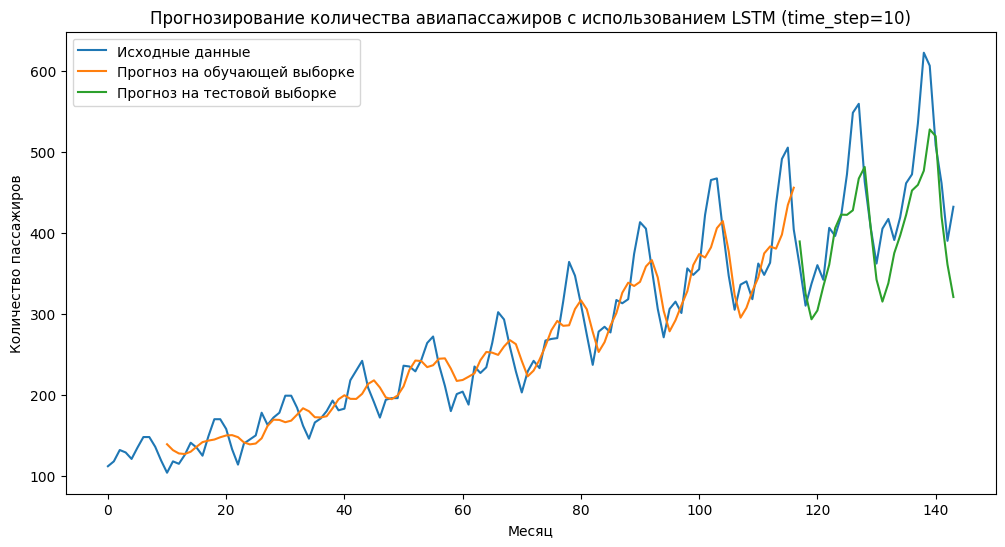

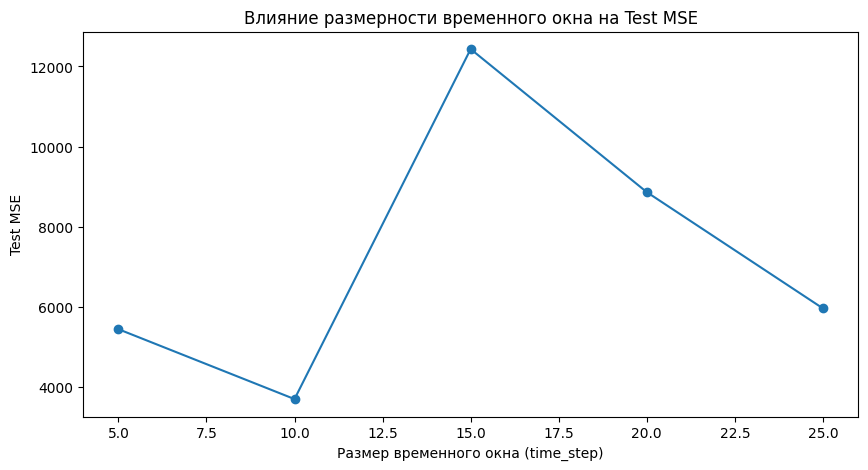

In [7]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import requests
import io

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Просмотр первых строк данных
print(data.head())

# Преобразование данных
data = data['Passengers'].values.astype(float)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Функция для создания выборок с заданным time_step
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Исследование влияния различных временных окон на качество прогноза
time_steps = [5, 10, 15, 20, 25]
results = []

for time_step in time_steps:
    print(f"\nОбучение модели с time_step = {time_step}")

    # Создание выборок
    X, y = create_dataset(data_normalized, time_step)

    # Разделение на обучающие и тестовые данные
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[0:train_size], X[train_size:]
    y_train, y_test = y[0:train_size], y[train_size:]

    # Изменение формы данных для LSTM [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Построение модели LSTM с улучшенной архитектурой
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))

    # Компиляция модели
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Обучение модели с измененными гиперпараметрами
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

    # Предсказание и обратное преобразование
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1,1))
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

    # Оценка модели
    train_mse = mean_squared_error(y_train_inv, train_predict)
    train_mae = mean_absolute_error(y_train_inv, train_predict)
    test_mse = mean_squared_error(y_test_inv, test_predict)
    test_mae = mean_absolute_error(y_test_inv, test_predict)

    print(f"Метрики для time_step = {time_step}:")
    print(f"Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}")

    # Сохранение результатов
    results.append({
        'time_step': time_step,
        'train_mse': train_mse,
        'train_mae': train_mae,
        'test_mse': test_mse,
        'test_mae': test_mae,
        'model': model,
        'train_predict': train_predict,
        'test_predict': test_predict,
        'X_train': X_train,
        'X_test': X_test,
        'y_train_inv': y_train_inv,
        'y_test_inv': y_test_inv
    })

# Выбор модели с наилучшим показателем (минимальный Test MSE)
best_result = min(results, key=lambda x: x['test_mse'])
best_time_step = best_result['time_step']
print(f"\nЛучшая модель получена при time_step = {best_time_step}")

# Визуализация результатов для лучшей модели
model = best_result['model']
train_predict = best_result['train_predict']
test_predict = best_result['test_predict']
X_train = best_result['X_train']
X_test = best_result['X_test']
y_train_inv = best_result['y_train_inv']
y_test_inv = best_result['y_test_inv']
time_step = best_time_step

# Смещение предсказаний для визуализации
train_predict_plot = np.empty_like(data_normalized)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict

test_predict_plot = np.empty_like(data_normalized)
test_predict_plot[:, :] = np.nan

# Вычисление индексов для тестовых предсказаний
start_idx = len(train_predict_plot) - len(test_predict)
end_idx = len(train_predict_plot)
test_predict_plot[start_idx:end_idx, :] = test_predict

# Визуализация результатов
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')
plt.plot(train_predict_plot, label='Прогноз на обучающей выборке')
plt.plot(test_predict_plot, label='Прогноз на тестовой выборке')
plt.title(f'Прогнозирование количества авиапассажиров с использованием LSTM (time_step={time_step})')
plt.xlabel('Месяц')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

# Визуализация ошибки MSE в зависимости от time_step
time_steps_list = [result['time_step'] for result in results]
test_mse_list = [result['test_mse'] for result in results]

plt.figure(figsize=(10,5))
plt.plot(time_steps_list, test_mse_list, marker='o')
plt.title('Влияние размерности временного окна на Test MSE')
plt.xlabel('Размер временного окна (time_step)')
plt.ylabel('Test MSE')
plt.show()


**Анализ результатов**

*Использование метрик MSE и MAE:*

После предсказания на обучающей и тестовой выборках рассчитываем ошибки Mean Squared Error (MSE) и Mean Absolute Error (MAE).

*Исследование влияния различных временных окон:*

Перебираем различные значения time_step из списка [5, 10, 15, 20, 25].

Для каждого значения time_step обучаем модель и сохраняем результаты.

Строим график зависимости Test MSE от time_step, чтобы оценить, как размер временного окна влияет на качество прогноза.